<a href="https://colab.research.google.com/github/lbiester/AI4All-UM-NLP/blob/master/2_Basic_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/My Drive/AI4All_3'

    import nltk
    nltk.download('punkt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/AI4All_3
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
%matplotlib inline

import lib
import spacy
import itertools
from collections import Counter
import statistics
import pandas as pd
import nltk

# Basic Language Processing
Now that we know a little bit about the demographics of the workers who helped to produce the dataset, let's start looking at the language! There are a few questions that we want to answer:
* What makes people happy?
* Do the things that cause happiness differ between groups?

We'll start by using some simple techniques to answer the first question!

First, we'll load the data. If you don't remember, look back at the first notebook to see how to load the joined data.

In [0]:
joined_data = lib.load_joined_data()

## Getting Sentences
First, go through `joined_data`, and create a list of happy moments. You will need to create a list of happy moments with various properties a few times, so make sure that you are very clear on how to do this using `joined_data`!

In [0]:
all_sentences = []
for hm in joined_data:
    all_sentences.append(hm['cleaned_hm'])

## Wordclouds

One way in which we can visualize text data is by using a word cloud. This will show us which words appear frequently in the text. Luckily, we don't need to write a bunch of code to display a word cloud - libraries exist to do it already! We have a function that can be used to create word clouds in the library, `lib.create_word_cloud`.

Warning: The word cloud library is a bit slow, so if it takes a minute or two to load, don't worry - it probably doesn't have anything to do with your code!

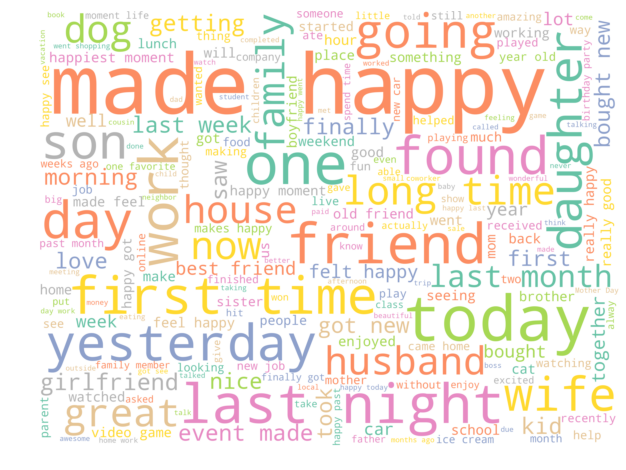

In [6]:
lib.create_word_cloud(all_sentences)

Now let's do something a bit more interesting: later on, we will classify happiness posts by if they are made by a man or a woman. Let's create two word clouds: one of posts made by men, and one of posts made by women, and see how they differ. This will require two steps

1. Separate out happy moments into entries written by women and entries written by men
1. Create word clouds of each

In [0]:
man_sentences = []
woman_sentences = []
for hm in joined_data:
    if hm['gender'] == 'm':
        man_sentences.append(hm['cleaned_hm'])
    elif hm['gender'] == 'f':
        woman_sentences.append(hm['cleaned_hm'])

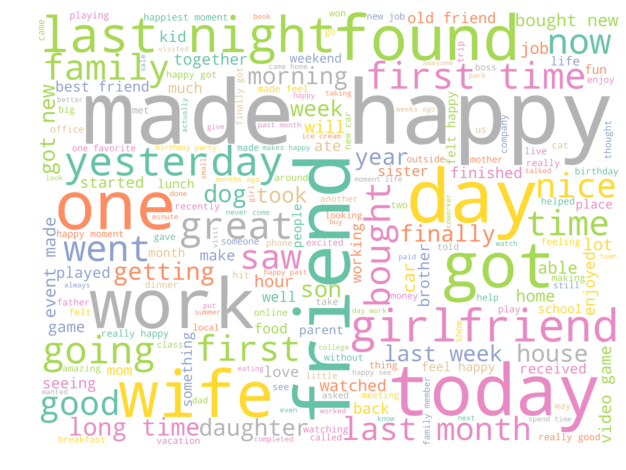

In [11]:
lib.create_word_cloud(man_sentences)

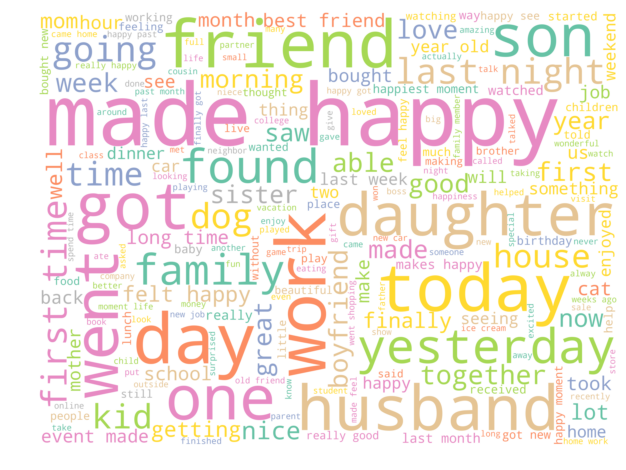

In [12]:
lib.create_word_cloud(woman_sentences)

You probably notice a few differences between the word clouds - take a minute to jot some of them down.

Even though there are some differences, you'll probably notice that the word clouds look quite similar overall. Words that don't seem to meaningful like "made happy" and "got" are large in both word clouds.

There are many ways that we can remove words that aren't meaningful. One typical approach is to use a "stopwords" list, which will include function words like "the", "a", "an", etc.

The wordcloud library actually has a built-in list of stopwords, but we also should filter out some words that are common in happy moments even if they aren't common in written text overall.

### Adding Domain-Specific Stopwords
Try creating a domain-specific stopwords list, using words that you see frequently for _both_ men and women. Because these words are so common overall, they don't have much meaning for happy moments. There are two ways that you can do this; feel free to try both:

1. Manually create a list
1. Create a list of all words that appear in the top 100 for men _and_ women. Those words are likely very common overall. To do so, you'll need to figure out all of the words in the happy moments. This is a process called **tokenization**, which we will explore more later. For now, we've tokenized for you, creating the lists `man_tokens` and `woman_tokens` below.

Something to you may notice is that the word cloud library uses n-grams (short phrases), not just individual words. It might be valuable to include multiple-word phrases like "made happy" in your stopwords list, even though it isn't really an individual word!

In [0]:
def get_all_tokens(sentences):
    tokens = []
    for sentence in sentences:
        tokens.extend(get_tokens(sentence))
    return tokens

def get_tokens(sentence):
    tokens = []
    for token in nltk.word_tokenize(sentence):
        tokens.append(token.lower())
    return tokens

man_tokens = get_all_tokens(man_sentences)
woman_tokens = get_all_tokens(woman_sentences)

In [0]:
# TODO: I'm currently doing this programmatically. I could ask the students to do it this way, or ask them to come up 
# with their own list. There are probably also smarter ways to do this, this is just a starting point

common_female_words = set(k for k, v in Counter(woman_tokens).most_common(100))
common_male_words = set(k for k, v in Counter(man_tokens).most_common(100))
stop = common_female_words.intersection(common_male_words)
stop.add('made happy')

After you have your personal stopwords list, pass it in to the word cloud function like this: `lib.create_word_cloud(tokens, stop=stop)` (it is an optional parameter).

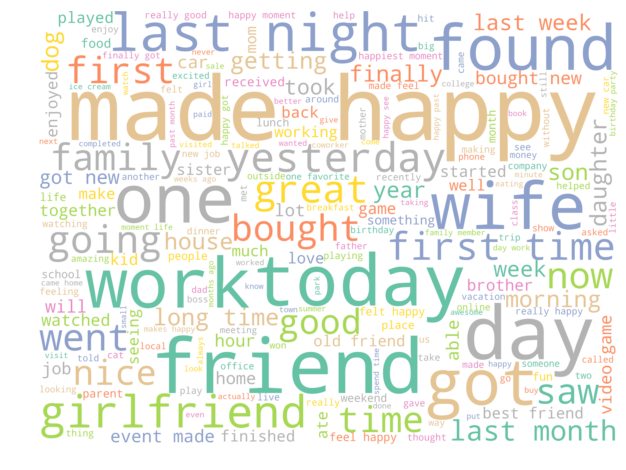

In [26]:
lib.create_word_cloud(man_tokens, stop=stop)

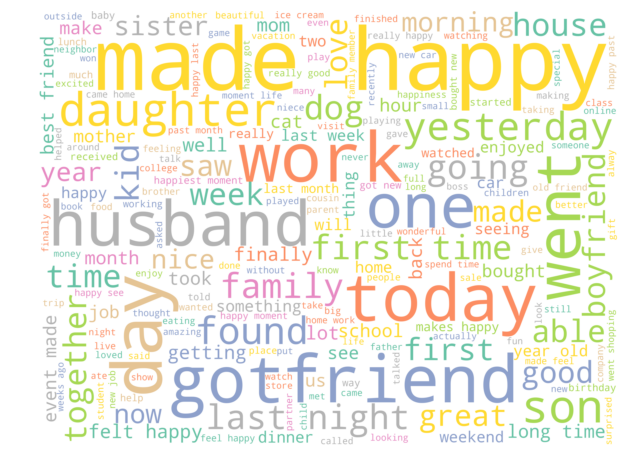

In [27]:
lib.create_word_cloud(woman_tokens, stop=stop)

Hopefully, you now see more noticeable differences between the word clouds.

Feel free to play around with the word clouds with different attributes, like age and country!

## Word Count
Something else that might differ between men and women is the number of words included in what they write. Collect the overall average word count, in addition to average for men and average for women. What do you find?

First, you'll need to count the tokens in each happy moment a) overall, b) for women, and c) for men. Create a list that has the number of tokens for each such happy moment.

Then, you'll need to calculate the average values. To do this, you can call `statistics.mean` on the list. We'll have an example of how to do that below.

In [0]:
overall_token_counts = []
woman_token_counts = []
man_token_counts = []

for hm in joined_data:
    n_tokens = len(nltk.word_tokenize(hm['cleaned_hm']))
    overall_token_counts.append(n_tokens)
    if hm['gender'] == 'f':
        woman_token_counts.append(n_tokens)
    elif hm['gender'] == 'm':
        man_token_counts.append(n_tokens)

In [31]:
# This is how `statistics.mean` is used:
numbers = [1, 2, 3, 4, 5]
print(statistics.mean(numbers))

3


In [33]:
print('Overall average:', statistics.mean(overall_token_counts))
print('Male average:', statistics.mean(man_token_counts))
print('Female average:', statistics.mean(woman_token_counts))

Overall average: 19.74588840015847
Male average: 19.163742068134283
Female average: 20.588124091129423


Who tends to write more? What about parental status? Do parents write more or less than non-parents? Do the same thing that you just did for men and women: count tokens for each group, then calculate the average.

In [0]:
parent_token_counts = []
non_parent_token_counts = []
for hm in joined_data:
    n_tokens = len(nltk.word_tokenize(hm['cleaned_hm']))
    overall_token_counts.append(n_tokens)
    if hm['parenthood'] == 'y':
        parent_token_counts.append(n_tokens)
    elif hm['parenthood'] == 'n':
        non_parent_token_counts.append(n_tokens)

In [36]:
print('Parent average:', statistics.mean(parent_token_counts))
print('Non-parent average:', statistics.mean(non_parent_token_counts))

Parent average: 21.012067807121817
Non-parent average: 18.918444649291878


It seems as though parents write a bit more than non-parents! Why do you think that could be?

Ultimately, word count does not tell us much about what makes different groups happy. However, it could be a useful tool when predicting who a happy moment description comes from. We will explore this more later. It does seem as though the word clouds, which represent which words are most frequently used when people talk about what makes them happy.